## Why Do We Only Look at Neighbors in Gibbs Sampling for the Ising Model?

### 1. The Ising Model Density

The joint probability distribution over all spin configurations $x = (x_1, x_2, \dots, x_n)$ in the Ising model is given by:

$$
p(x) = \frac{1}{Z(\alpha, \beta)} \exp\left( \alpha \sum_i x_i + \beta \sum_{i \sim j} \mathbb{1}_{x_i = x_j} \right)
$$


Here:
- $Z(\alpha, \beta)$ is the partition function (normalizing constant),
- $\alpha$ controls the external magnetic field,
- $\beta$ controls the interaction strength between neighbors.




## Why Do We Only Look at Neighbors in Gibbs Sampling?

This is the result of **Markov Random Fields (MRFs)**.

**Key Concept:**  
In the Ising model, each variable (spin) is conditionally independent of all the others given its neighbors.

This is what defines an **MRF**:

$$
P(x_i \mid x_{-i}) = P(x_i \mid \text{neighbors of } i)
$$

So when we use Gibbs sampling, we sample from the conditional distribution:

$$
P(x_{i,j} \mid \text{all other spins}) = P(x_{i,j} \mid \text{neighbors of } (i,j))
$$

Which is why you only look at the 4 neighbors when updating the spin at $(i,j)$. That’s all the information you need.

### Where Does This Conditional Probability Come From?

From the joint density:

$$
p(x) \propto \exp\left( \alpha \sum_i x_i + \beta \sum_{i \sim j} 1_{x_i = x_j} \right)
$$

When you fix all spins except $x_{i,j}$, only the terms in the sum that involve $x_{i,j}$ matter when computing its conditional distribution. Those are the 4 neighbor interactions and the local field $\alpha x_{i,j}$.

### Case 1: $ x_{i,j} = 1 $

- **Local field contribution**: $ \alpha \times 1 = \alpha $
- **Neighbor interaction contribution**:
  - Each of the $ S_{i,j} $ neighbors equal to 1 adds $ \beta $
  - Each of the $ 4 - S_{i,j} $ neighbors equal to 0 adds 0

**Total contribution**:

$$
\text{Interaction term: } \beta \times S_{i,j}
$$

**Unnormalized probability**:

$$
p_1 \propto \exp(\alpha + \beta S_{i,j})
$$

---

### Case 2: $ x_{i,j} = 0 $

- **Local field contribution**: $ \alpha \times 0 = 0 $
- **Neighbor interaction contribution**:
  - Each of the $ 4 - S_{i,j} $ neighbors equal to 0 adds $ \beta $

**Total contribution**:

$$
\text{Interaction term: } \beta (4 - S_{i,j})
$$

**Unnormalized probability**:

$$
p_0 \propto \exp(\beta (4 - S_{i,j}))
$$

---

### Final Normalized Conditional Probabilities

Now, normalize these two probabilities:

$$
P(x_{i,j} = 1 \mid \text{neighbors}) = \frac{\exp(\alpha + \beta S_{i,j})}{\exp(\alpha + \beta S_{i,j}) + \exp(\beta (4 - S_{i,j}))}
$$

and

$$
P(x_{i,j} = 0 \mid \text{neighbors}) = \frac{\exp(\beta (4 - S_{i,j}))}{\exp(\alpha + \beta S_{i,j}) + \exp(\beta (4 - S_{i,j}))}
$$

---

In [1]:
from modules.Gibbs_sampler import *

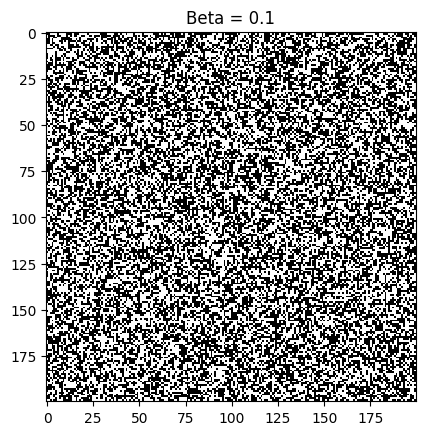

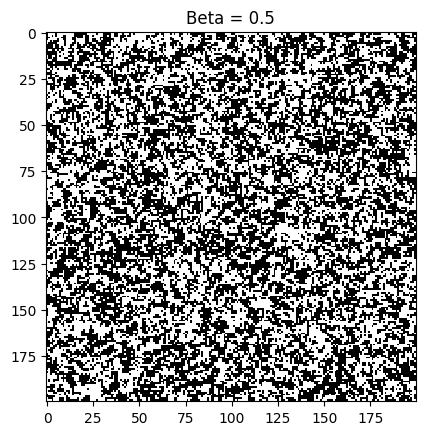

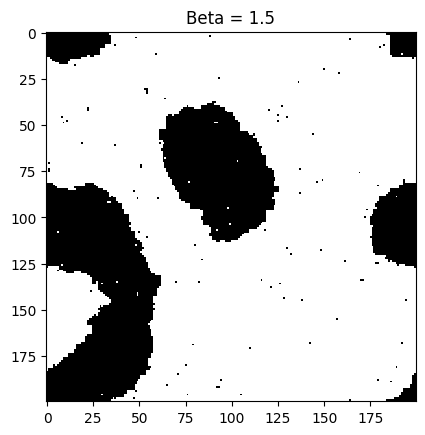

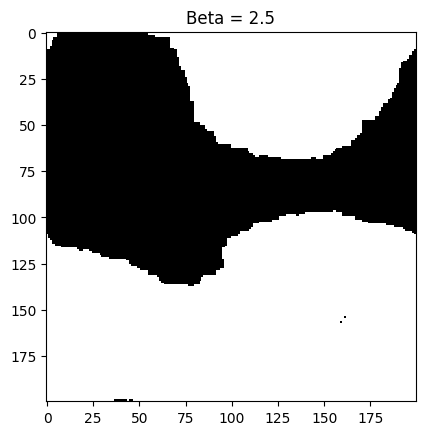

In [2]:
# Parameters
L = 200  # Lattice size
alpha = 0  # No external field
betas = [0.1, 0.5, 1.5, 2.5]  # Different beta values

# Run and visualize for different beta values
for beta in betas:
    final_lattice = run_gibbs(L, alpha, beta, steps=1000)
    plot_lattice(final_lattice, title=f"Beta = {beta}")

# How Does the Realization Behave When $ \beta $ Increases?

In the **Ising model**, the parameter $ \beta $ controls how strongly spins interact with their neighbors. Increasing $ \beta $ has a **significant effect** on the system's behavior.

---

## 1. Low $ \beta $ (High Temperature, Weak Interaction)
- At small $ \beta $ (e.g., $ \beta = 0.1 $), the system behaves **almost randomly**.
- Spins **flip frequently**, leading to a **disordered state**.
- There are no large clusters of aligned spins.
- The system is in a **paramagnetic phase** (no global magnetization).

👉 **Interpretation**: At high temperatures, thermal noise dominates, preventing order from forming.

---

## 2. Intermediate $ \beta $ (Transition Region)
- As $ \beta $ increases (e.g., $ \beta = 0.5 $), **small clusters of aligned spins start to form**.
- However, there are still frequent fluctuations (some noise).
- The system is **in transition** between disorder and order.
- The behavior depends on whether $ \beta $ is **below or above the critical value** $ \beta_c $.

👉 **Interpretation**: The system is approaching a **phase transition**.

---

## 3. High $ \beta $ (Low Temperature, Strong Interaction)
- When $ \beta $ is large (e.g., $ \beta = 2.5 $ or higher), spins tend to **align with their neighbors**.
- This leads to **large clusters** of spins with the same value.
- Eventually, the whole system becomes **fully magnetized** (either all 0s or all 1s).
- The system is in a **ferromagnetic phase**.

👉 **Interpretation**: At low temperatures, interactions dominate, and the system prefers an **ordered** state.

---

## 4. The Critical Point and Phase Transition
- There is a **critical value** $ \beta_c $ where the system **transitions** from disorder to order.
- This is known as a **phase transition**, similar to how water freezes at $ 0^\circ C $.
- In 2D, the critical value is **approximately**:
  
  $
  \beta_c \approx \frac{\ln(1 + \sqrt{2})}{2} \approx 0.44
  $
  
- Below $ \beta_c $, the system is disordered (high-temperature phase).
- Above $ \beta_c $, the system orders (low-temperature phase).

---

## Visualization of Effects of Increasing $ \beta $
If we plot the lattice for different values of $ \beta $, we observe:

| **$ \beta $**  | **Lattice Configuration** |
|-----------------|---------------------------|
| $ \beta = 0.1 $ | Mostly random spins (no clusters) |
| $ \beta = 1.0 $ | Small clusters start forming |
| $ \beta = 1.5 $ | Larger clusters, signs of order |
| $ \beta = 2.5 $ | Almost fully magnetized (aligned spins) |



